# Pakete

In [212]:
#import Pakete
#plotten:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#rechnen:
import numpy as np
from statistics import mean

#fitten:
import scipy 
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema #für maxima/minima auch lokal
import scipy.special as sp
#import scipy.constants as sp # für grundlegende Konstanten --> https://docs.scipy.org/doc/scipy/reference/constants.html
#--> eher selbst machen 

#paket für automatische invertierung Funktion --> sehr nützlich
#from pynverse import inversefunc

#dateneinlesen einfach
import pylab as py 

import IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import os  

In [213]:
def Stress_aus_curvature(k, k_0, d_sub, d_film, M_sub):
    #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
    return ((k-k_0) *(d_sub**2) *M_sub ) / (6 * d_film)

def Stress_aus_curvature_ohne_relaxation(k, d_sub, d_film, M_sub):
    #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
    return (k *(d_sub**2) *M_sub ) / (6 * d_film)

def Strain_aus_curvature(k, k_0, d_sub, d_film, M_sub, M_film):
    #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
    return ((k-k_0) *(d_sub**2) *M_sub ) / (6 * d_film * M_film)

# Datenladen

In [214]:
#Path zu daten definieren
path = "./Daten//"  

In [215]:
# Methode die Daten Zeilenweise einliest
#with open(path + "Curvature Data MD-GaN-Ge.txt") as f1: 
#        data_txt = [[cell.strip() for cell in row.split('\t')] for row in f1]
#print(data_txt)

# Methode die Daten spaltenweise einliest
#x,y=py.loadtxt(path+ "Curvature Data MD-GaN-Ge.txt", unpack=True, skiprows=2)
#print(x)

In [216]:
#Daten Probe:
#h=0.455 #mm
#a=


In [217]:
x_in_s,y_curvature_in_km,y_reflektomitrie=py.loadtxt(path+ "Curvature Data MD-GaN-Ge_Refektometrie.txt", unpack=True, skiprows=2)
print(x_in_s)
print(y_curvature_in_km)
x_in_min=x_in_s/60
print(x_in_min)
print(len(y_reflektomitrie))

[5.99500000e-01 2.99850100e+00 5.39150000e+00 ... 4.93487205e+04
 4.93511165e+04 4.93535125e+04]
[-227.547511    7.934096    9.280352 ... -475.713335 -475.713335
 -475.713335]
[9.99166667e-03 4.99750167e-02 8.98583333e-02 ... 8.22478675e+02
 8.22518608e+02 8.22558542e+02]
20601


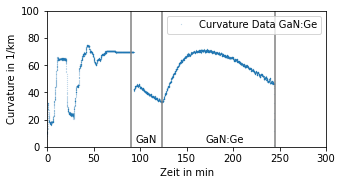

In [218]:
fig = plt.figure(figsize=(5,2.5))
plt.plot(x_in_min, y_curvature_in_km, 'o',markersize=0.1, label="Curvature Data GaN:Ge")#, markevery=10
plt.axvline(x=245, ymin=0, ymax=1, color='gray')
plt.axvline(x=124, ymin=0, ymax=1, color='gray')
plt.axvline(x=90, ymin=0, ymax=1, color='gray')#x=58
#plt.axvline(x=30, ymin=0, ymax=1, color='gray')
plt.text(x=95,y=3,s='GaN')
plt.text(x=170,y=3,s='GaN:Ge')
plt.ylim (0, 100)
plt.xlim (0, 300)
plt.ylabel('Curvature in 1/km')
plt.xlabel('Zeit in min')
plt.legend()
plt.savefig('Bilder/Curvature_Daten_Probenwachstum', bbox_inches = "tight")
plt.show()

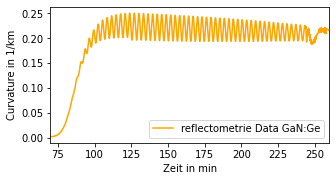

In [219]:
fig = plt.figure(figsize=(5,2.5))
plt.plot(x_in_min, y_reflektomitrie, color='orange', label="reflectometrie Data GaN:Ge")#,markersize=0.5
#plt.ylim (0, 100)
plt.xlim (70, 260)
plt.ylabel('Curvature in 1/km')
plt.xlabel('Zeit in min')
plt.legend()
plt.savefig('Bilder/reflectometrie_Daten_Probenwachstum', bbox_inches = "tight")
plt.show()

In [220]:
#a möglickeit bestimmung ob Punkt Maxima ist über np --> vergleicht jeden Punkt mit nachbarn und gibt true wenn es ein max ist
a=np.r_[True, y_reflektomitrie[1:] > y_reflektomitrie[:-1]] & np.r_[y_reflektomitrie[:-1] > y_reflektomitrie[1:], True]
print(a)
print(len(a))

#b möglickeit bestimmung ob Punkt Maxima ist über np --> vergleicht jeden Punkt mit 2ten nachbarn und gibt true wenn es ein max ist
b=np.r_[True, y_reflektomitrie[2:] > y_reflektomitrie[:-2]] & np.r_[y_reflektomitrie[:-2] > y_reflektomitrie[2:], True]
#len(np.r_[True, y_reflektomitrie[1:] < y_reflektomitrie[:-1]] & np.r_[y_reflektomitrie[:-1] < y_reflektomitrie[1:], True])
print(b)
print(len(b))

#c möglickeit bestimmung ob Punkt Maxima ist über np --> vergleicht jeden Punkt mit 3ten nachbarn und gibt true wenn es ein max ist
c=np.r_[True, y_reflektomitrie[3:] > y_reflektomitrie[:-3]] & np.r_[y_reflektomitrie[:-3] > y_reflektomitrie[3:], True]
#len(np.r_[True, y_reflektomitrie[1:] < y_reflektomitrie[:-1]] & np.r_[y_reflektomitrie[:-1] < y_reflektomitrie[1:], True])
print(c)
print(len(c))

[ True False False ... False  True False]
20601
[ True False False ... False  True False]
20600
[ True False  True ... False  True False]
20599


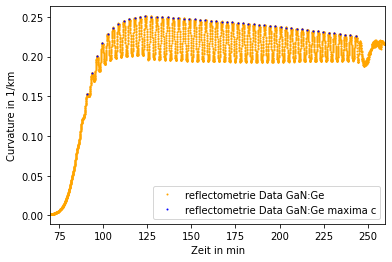

In [221]:
#Maxima von a, b und c:
x_test=[]
y_test=[]
for i in range(len(c)):
    if c[i] == True:
        x_test.append(x_in_min[i]) 
        y_test.append(y_reflektomitrie[i])

#x_test_2=[]
#y_test_2=[]
#for i in range(len(b)):
#    if b[i] == True:
#        x_test_2.append(x_in_min[i]) 
#        y_test_2.append(y_reflektomitrie[i])
        
#x_test_3=[]
#y_test_3=[]
#for i in range(len(a)):
#    if a[i] == True:
#        x_test_3.append(x_in_min[i]) 
#        y_test_3.append(y_reflektomitrie[i])
#print(x_test)
#print(y_test)

plt.plot(x_in_min, y_reflektomitrie, 'o', color='orange',markersize=1, label="reflectometrie Data GaN:Ge")
plt.plot(x_test[166:217], y_test[166:217], 'o', color='b',markersize=1, label="reflectometrie Data GaN:Ge maxima c")
#plt.plot(x_test_2, y_test_2, 'o', color='r',markersize=1, label="reflectometrie Data GaN:Ge maxima b")
#plt.plot(x_test_3, y_test_3, 'o', color='g',markersize=1, label="reflectometrie Data GaN:Ge maxima a")

#plt.ylim (0, 100)
plt.xlim (70, 260)
#plt.xlim (243.75, 245)
plt.ylabel('Curvature in 1/km')
plt.xlabel('Zeit in min')
plt.legend()
plt.show()



In [222]:
diffs=[]
for i in range(len(x_test[166:217])):
    if i > 0:
        diffs.append(x_test[166:217][i]-x_test[166:217][i-1])
mitteldiff=mean(diffs)
print(len(x_test[166:217])) #evt noch + 2 da eine osszillation am anfang sehr klein ersichtlich und eine am ende leicht schief
print(diffs)
print(mitteldiff) # d.h. im mittel eine Oszillation alle 3.04min ab startpunkt

print("\nan Zeitpunkt:", x_test[166:217][0], "ist dann GaN dicke rund 0")
print("bei wachtstumsrate von 132nm pro oszillation ist dann am endpunkt der 51 oszillation bei", x_test[166:217][50], 
      "min, die dicke bei", 132*51,"nm bei den geplotteten maxima")
print("mit den weiteren 2 ersichtlichen aber nicht geplotteten ergibt sich dann eine dicke der GaN schicht von", 132*53)

51
[2.674849999999992, 2.794466666666665, 2.994083333333336, 2.9941166666666703, 3.0340166666666732, 3.073999999999984, 3.074300000000008, 3.0741000000000014, 3.0742500000000064, 3.073783333333324, 3.0740333333333325, 3.193883333333332, 3.11399999999999, 3.1542833333333533, 3.1136833333333414, 3.0741333333333216, 3.074150000000003, 3.0742166666666435, 3.073916666666662, 3.0739166666666904, 3.0343499999999892, 3.073516666666677, 3.03391666666667, 3.0741999999999905, 3.0337000833333434, 3.073966666666678, 3.0341666666666356, 3.0445166666666807, 3.0335999999999785, 3.033816666666695, 3.033666666666676, 3.0338999999999885, 3.0335833333333255, 3.0734500000000082, 3.033466666666669, 3.0337333333333163, 3.0334166666666817, 3.0335333333333097, 3.0734666666666897, 3.0335833333333255, 3.033699999999982, 3.073483333333371, 3.033649999999966, 3.0337000000000103, 3.073666666666668, 3.0339333333333514, 3.0336499999999944, 3.0338166666666666, 3.0737166666666553, 3.0738000000000056]
3.0452970016666665

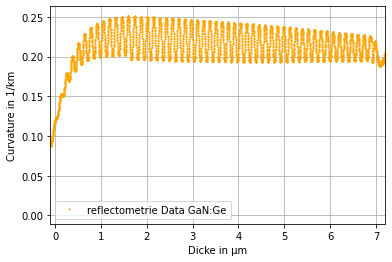

Fehlerbetrachtung: da nur von sichtbaren Oszillationen berechnet kann der fehler nach links und rechts rung eine halbe Oszillation sein die nicht mehr beachtet werden kann d.h. das mein gesammtfehler rund eine Oszillation ist --> aufrunden zu rund 150nm


In [223]:
x_in_nm_nach_GaN_start=[]
for i in x_in_min:
    x_in_nm_nach_GaN_start.append(i-x_test[166:217][0]+1*mitteldiff) #neue 0 an erstem ersichtlichen max siehe oben neben erstem geplottetem max

x_in_nm_nach_GaN_start=x_in_nm_nach_GaN_start/(x_test[166:217][50]-x_test[166:217][0])
x_in_nm_nach_GaN_start=x_in_nm_nach_GaN_start*6732
x_in_muem_nach_GaN_start=x_in_nm_nach_GaN_start/1000 
#verschieben Nullpunkt sodass 0 bei GaN:Ge Air interface
#for j in range(len(x_in_muem_nach_GaN_start)):
#    x_in_muem_nach_GaN_start[j]=x_in_muem_nach_GaN_start[j]-7

plt.plot(x_in_muem_nach_GaN_start, y_reflektomitrie, 'o', color='orange',markersize=1, label="reflectometrie Data GaN:Ge")
#plt.plot(x_test[166:217], y_test[166:217], 'o', color='b',markersize=1, label="reflectometrie Data GaN:Ge maxima c")
#plt.plot(x_test_2, y_test_2, 'o', color='r',markersize=1, label="reflectometrie Data GaN:Ge maxima b")
#plt.plot(x_test_3, y_test_3, 'o', color='g',markersize=1, label="reflectometrie Data GaN:Ge maxima a")

#plt.ylim (0, 100)
#plt.xlim (70, 260)
#plt.xlim (-7.2,0.1)
plt.xlim (-0.1,7.2)
plt.ylabel('Curvature in 1/km')
plt.xlabel('Dicke in \u03bcm') 
plt.grid()
plt.legend()
plt.show()

print("Fehlerbetrachtung: da nur von sichtbaren Oszillationen berechnet kann der", 
      "fehler nach links und rechts rung eine halbe Oszillation sein die nicht mehr beachtet werden kann",
     "d.h. das mein gesammtfehler rund eine Oszillation ist --> aufrunden zu rund 150nm", )

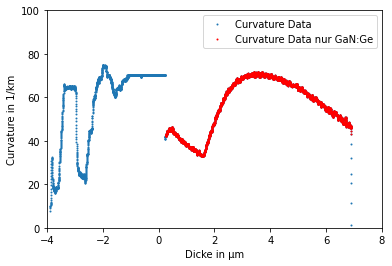

In [224]:
# daraus ergibt sich für die curvature über dicke
x_in_muem_nach_GaN_start_wichtiger_Bereich = []
y_curvature_in_km_wichtiger_Bereich = []
for i in range(len(x_in_muem_nach_GaN_start)):
    if x_in_muem_nach_GaN_start[i] >= 0.25 and x_in_muem_nach_GaN_start[i] <= 6.9: 
        #wegen neuer null bei Air interface wurde pereiche invertiert: if x_in_muem_nach_GaN_start[i] <= -0.15 and x_in_muem_nach_GaN_start[i] >= -6.75    :(wenn 0 an GaN wachstumsbeginn: if x_in_muem_nach_GaN_start[i] >= 0.25 and x_in_muem_nach_GaN_start[i] <= 6.9)
        x_in_muem_nach_GaN_start_wichtiger_Bereich.append(x_in_muem_nach_GaN_start[i])
        y_curvature_in_km_wichtiger_Bereich.append(y_curvature_in_km[i])

#print(x_in_muem_nach_GaN_start_wichtiger_Bereich)
plt.plot(x_in_muem_nach_GaN_start, y_curvature_in_km, 'o',markersize=1, label="Curvature Data")
plt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, y_curvature_in_km_wichtiger_Bereich, 'o',color='r', markersize=1, label="Curvature Data nur GaN:Ge")
#plt.axvline(x=245, ymin=0, ymax=1, color='gray')
#plt.axvline(x=124, ymin=0, ymax=1, color='gray')
#plt.axvline(x=58, ymin=0, ymax=1, color='gray')
#plt.axvline(x=30, ymin=0, ymax=1, color='gray')
#plt.text(x=80,y=3,s='GaN')
#plt.text(x=170,y=3,s='GaN:Ge')
plt.ylim (0, 100)
#plt.xlim (-8, 4)
plt.xlim (-4, 8)
plt.ylabel('Curvature in 1/km')
plt.xlabel('Dicke in \u03bcm')
plt.legend()
plt.savefig('Bilder/Curvature_Daten_Probenwachstum_nach_Dicke_GaN')
plt.show()

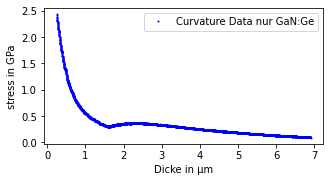

In [225]:
#berechnen stress über dicke:
# def Stress_aus_curvature(k, k_0, d_sub, d_film, M_sub):
#     #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
#     return ((k-k_0) *(d_sub**2) *M_sub ) / (6 * d_film)
#def Stress_aus_curvature_ohne_relaxation(k, d_sub, d_film, M_sub):
#    #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
#    return (k *(d_sub**2) *M_sub ) / (6 * d_film)
M_sub = 430.14 #GPa für Saphir
d_sub = 0.4479 #mm für Saphir

stress= []
stress_ohne_relaxation= []
for i in range(len(x_in_muem_nach_GaN_start_wichtiger_Bereich)):
    stress.append( Stress_aus_curvature( y_curvature_in_km_wichtiger_Bereich[i]*10**-3, y_curvature_in_km_wichtiger_Bereich[0]*10**-3, d_sub*10**-3,x_in_muem_nach_GaN_start_wichtiger_Bereich[i]*10**-6, M_sub))
    stress_ohne_relaxation.append( Stress_aus_curvature_ohne_relaxation( y_curvature_in_km_wichtiger_Bereich[i]*10**-3, d_sub*10**-3,x_in_muem_nach_GaN_start_wichtiger_Bereich[i]*10**-6, M_sub))
    
fig = plt.figure(figsize=(5,2.5))    
#lt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress, 'o',color='r', markersize=1, label="GaN:Ge mit angenommener ralaxion")
plt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress_ohne_relaxation, 'o',color='b', markersize=1, label="Curvature Data nur GaN:Ge")
#plt.ylim (0, 1)
#plt.xlim (-4, 8)
plt.ylabel('stress in GPa')
plt.xlabel('Dicke in \u03bcm')
plt.legend()
plt.savefig('Bilder/stress_aus_Curvature_Daten_Probenwachstum_nach_Dicke_GaN', bbox_inches = "tight")
plt.show()

#print("berechnung unter Annahme kompleter relaxion während wachstum der Probe, wobei k_0 die curvature ist am anfang des schichtwachstums --> daher am anfang =0")

In [226]:
#berechnen strain über dicke:
# def Strain_aus_curvature(k, k_0, d_sub, d_film, M_sub, M_film):
#     #aus Quelle: A. Krost_2003_GaN-based epitaxy on silicon; stress measurements
#     return ((k-k_0) *(d_sub**2) *M_sub ) / (6 * d_film * M_film)
#M_sub = 430.14 #GPa für Saphir
#M_film = 396 #GPa für GaN
#d_sub = 0.4479 *(10**-3) #mm für Saphir

#strain= []
#for i in range(len(x_in_muem_nach_GaN_start_wichtiger_Bereich)):
#    strain.append( Strain_aus_curvature( y_curvature_in_km_wichtiger_Bereich[i]*(10**-3), y_curvature_in_km_wichtiger_Bereich[0]*(10**-3), d_sub, x_in_muem_nach_GaN_start_wichtiger_Bereich[i]*10**-6, M_sub,M_film))
    
#plt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, strain, 'o',color='r', markersize=1, label="GaN:Ge mit angenommener ralaxion")
#plt.ylabel('strain')
#plt.xlabel('Dicke in \u03bcm')
#plt.legend()
#plt.show()

In [227]:
#Stress vergleich von Raman und in situ:

In [228]:
# laden der Frequenzen der MEPA und A-Plane aus txt die in jeweiligen anderen Programmen erstellt wurden zur datenübertragung
datei = open('stress_data_GaN.txt','r')
#print(datei.read())
GaN_Stress=[]
for zeile in datei:
	GaN_Stress.append(float(zeile))
datei.close()

datei = open('stress_data_GaN_Positionen.txt','r')
#print(datei.read())
GaN_Stress_Positionen=[]
for zeile in datei:
	GaN_Stress_Positionen.append(float(zeile))
datei.close()

In [229]:
#fig = plt.figure(figsize=(10,5))
#plt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress, 'o',color='r', markersize=1, label="GaN:Ge mit angenommener ralaxion")
 # against 1st x, 1st y
#plt.ylim (0, 1)
#plt.xlim (-1, 8)
#plt.ylabel('stress in GPa', color='r')
#plt.xlabel('Dicke in \u03bcm', color='r')
#plt.legend()
#plt.tight_layout ()
#plt.twinx()
#plt.twiny()
#plt.plot(GaN_Stress_Positionen,GaN_Stress, '-o',color='b', markersize=2, label="GaN:Ge mit angenommener ralaxion") # against 2nd x, 2nd y
#plt.ylim (0, 1)
#plt.xlim (-13, 5.5)
#plt.ylabel('stress (GPa)', color='b')
#plt.xlabel('Dicke (\u03bcm)', color='b')
#plt.legend()
#plt.tight_layout ()
#plt.show()

In [ ]:
#verschieben Nullpunkt sodass 0 bei GaN:Ge Air interface
for h in range(len(x_in_muem_nach_GaN_start_wichtiger_Bereich)):
    x_in_muem_nach_GaN_start_wichtiger_Bereich[h]=x_in_muem_nach_GaN_start_wichtiger_Bereich[h]-7


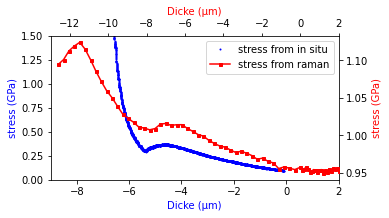

In [237]:

rect = 0.1, 0.1, 0.8, 0.8

fig = plt.figure(figsize=(5,2.5))

ax1 = fig.add_axes(rect)

#ax1.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress, 'o',color='b', markersize=1, label="stress from in situ")
ax1.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress_ohne_relaxation, 'o',color='b', markersize=1, label="stress from in situ")
ax1.set_xlabel('Dicke (\u03bcm)', color='b')
ax1.set_ylabel('stress (GPa)', color='b')
ax1.set_xlim([-9, 2])
ax1.set_ylim([0, 1.5])
#ax1.legend()
#plt.gcf().subplots_adjust(bottom=0.5)

ax2 = fig.add_axes(rect, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
#plt.tight_layout()
ax2.plot(GaN_Stress_Positionen,GaN_Stress, '-s',color='r', markersize=3, label="stress from raman") # against 2nd x, 2nd y

ax2.set_xlabel('Dicke (\u03bcm)', color='r')
ax2.set_ylabel('stress (GPa)', color='r')
ax2.set_xlim([-13, 2])
#ax2.set_ylim([0.9, 1.15])
#ax2.legend()
fig.legend(bbox_to_anchor=(0.9, 0.9, 0, 0))
#plt.tight_layout()
plt.savefig('Bilder/stress_GaN_Vgl_Raman_InSitu', bbox_inches = "tight")
plt.show()

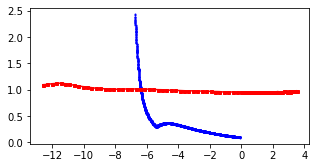

In [233]:
fig = plt.figure(figsize=(5,2.5))
plt.plot(x_in_muem_nach_GaN_start_wichtiger_Bereich, stress_ohne_relaxation, 'o',color='b', markersize=1, label="stress from in situ")
plt.plot(GaN_Stress_Positionen,GaN_Stress, '-s',color='r', markersize=3, label="stress from raman") # against 2nd x, 2nd y
